In [22]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

data_dir = os.path.join('..', 'data', 'zillow')


In [23]:

def generate_fname(data_type: str, price_to_use: str, smoothing: bool, seasonal_adjustment: bool, 
                   granularity: str) -> str:
    str_former = []
    if data_type == 'sale_price':
        str_former.append('Metro_')
        str_former.append(price_to_use)
        str_former.append('_sale_price_uc_sfrcondo_')

        if smoothing: str_former.append('sm_')
        if seasonal_adjustment: str_former.append('sa_')
        str_former.append(granularity)
    elif data_type == 'pct_sold_above_list':
        str_former.append('Metro_')
        str_former.append('pct_sold_above_list_uc_sfrcondo_')
        if smoothing: str_former.append('sm_')
        str_former.append(granularity)
    elif data_type == 'pct_sold_below_list':
        str_former.append('Metro_')
        str_former.append('pct_sold_below_list_uc_sfrcondo_')
        if smoothing: str_former.append('sm_')
        str_former.append(granularity)
    elif data_type == 'sale_to_list_ratio':
        # Metro_mean_sale_to_list_uc_sfrcondo_sm_month
        str_former.append('Metro_')
        str_former.append(price_to_use)
        str_former.append('_sale_to_list_uc_sfrcondo_')
        if smoothing: str_former.append('sm_')
        str_former.append(granularity)
    elif data_type == 'market_heat_index':
        # Metro_market_temp_index_uc_sfrcondo_month
        str_former.append('Metro_')
        str_former.append('market_temp_index_uc_sfrcondo_')
        str_former.append(granularity)
    elif data_type == 'home_value_index':
        # Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_month
        str_former.append('Metro_')
        str_former.append('zhvi_uc_sfrcondo_tier_0.33_0.67_')
        if smoothing: str_former.append('sm_')
        if seasonal_adjustment: str_former.append('sa_')
        str_former.append(granularity)
    elif data_type == 'home_value_forecast':
        # Metro_zhvf_growth_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv
        str_former.append('Metro_')
        str_former.append('zhvf_growth_uc_sfrcondo_tier_0.33_0.67_')
        if smoothing: str_former.append('sm_')
        if seasonal_adjustment: str_former.append('sa_')
        str_former.append(granularity)
    
    str_former.append('.csv')
    
    return ''.join(str_former)

# ------------------------------------------------

def get_data(data_type: str, price_to_use: str, smoothing: bool, seasonal_adjustment: bool, \
             granularity: str) -> pd.DataFrame:
    fname = generate_fname(data_type, price_to_use, smoothing, seasonal_adjustment, granularity)
    fpath = os.path.join(data_dir, fname)
    if not os.path.exists(fpath):
        raise FileNotFoundError(fpath)
    print("Reading data from:", fpath)
    return pd.read_csv(fpath)


In [24]:
# 'sale_price', 'pct_sold_above_list', 'sale_to_list_ratio', 'market_heat_index', 'home_value_index', 'home_value_forecast'
data_type = 'sale_price' 
price_to_use = 'mean' # 'mean' or 'median'
smoothing = True # True or False
seasonal_adjustment = True # True or False
granularity = 'week' # 'week' or 'month'

data_df = get_data(data_type, price_to_use, smoothing, seasonal_adjustment, granularity)


Reading data from: ..\data\zillow\Metro_mean_sale_price_uc_sfrcondo_sm_sa_week.csv


In [25]:
data_df.shape

(255, 733)

In [26]:
data_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2010-07-31,2010-08-07,2010-08-14,2010-08-21,2010-08-28,...,2024-05-04,2024-05-11,2024-05-18,2024-05-25,2024-06-01,2024-06-08,2024-06-15,2024-06-22,2024-06-29,2024-07-06
0,102001,0,United States,country,NaN,246148.0,245084.0,242945.0,241238.0,238390.0,...,491436.0,492026.0,493841.0,496336.0,498690.0,500483.0,502654.0,505235.0,505125.0,505714.0
1,394913,1,"New York, NY",msa,NY,515540.0,531310.0,544773.0,543626.0,544951.0,...,767897.0,779489.0,786713.0,795354.0,802920.0,799516.0,805901.0,814297.0,818962.0,818182.0
2,753899,2,"Los Angeles, CA",msa,CA,492901.0,481044.0,481118.0,483878.0,483049.0,...,1252092.0,1249477.0,1260457.0,1269153.0,1269113.0,1264200.0,1263234.0,1267439.0,1265488.0,1261432.0
3,394463,3,"Chicago, IL",msa,IL,260830.0,264983.0,265653.0,268809.0,269498.0,...,396560.0,401446.0,401173.0,400464.0,400756.0,405146.0,415464.0,430190.0,435373.0,438962.0
4,394514,4,"Dallas, TX",msa,TX,218487.0,216730.0,212405.0,209791.0,205100.0,...,507069.0,514047.0,519949.0,525924.0,527197.0,524126.0,524656.0,518561.0,508930.0,504440.0


##### Let's check if there are missing values in the data.

In [27]:
data_df.isna().sum().sum()

50907

Answer: Yes, there are many missing values.

##### Let's check how many unique values we have got for each of the identifier columns and region and state etc.

In [28]:
uniques = data_df[['RegionID', 'RegionName', 'RegionType', 'StateName']].nunique()

print("# of unique region IDs: ", uniques['RegionID'])
print("# of unique region Names: ", uniques['RegionName'])
print("# of unique region types: ", uniques['RegionType'])
print("# of unique state names: ", uniques['StateName'])



# of unique region IDs:  255
# of unique region Names:  255
# of unique region types:  2
# of unique state names:  44


##### Check if one region has multiple rows/records? 

In [29]:
data_df.groupby('RegionName').size().nunique()

1

Answer: No - each row is a unique RegionName.

#####  Let's check distribution/number of regions/records from each state.

<Axes: xlabel='StateName'>

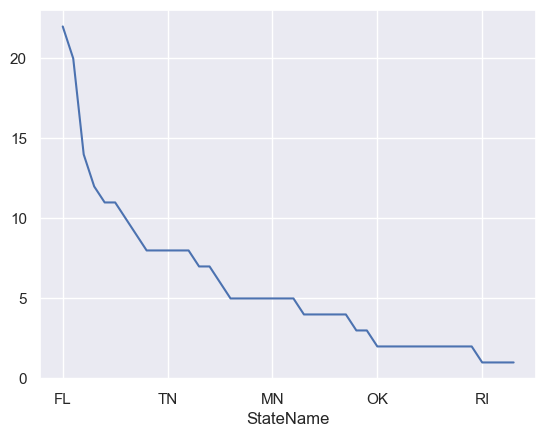

In [30]:
data_df.groupby('StateName').size().sort_values(ascending=False).plot()

We have a skewed distribution in terms of how many regions we have for states.

#####  Are there NaN or inf values in the ID columns like RegionName/StateName etc?

In [31]:
data_df[['RegionID', 'RegionName', 'RegionType', 'StateName']].isna().sum()

RegionID      0
RegionName    0
RegionType    0
StateName     1
dtype: int64

Answer: No - There are no missing ID values except for one NaN in the StaeName - which is for the USA country level record.

In [32]:
id_cols = ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName']
non_id_cols = [col for col in data_df.columns if col not in id_cols]

#####  Which Regions have most missing price values?

In [33]:
nan_pcts = (data_df.isna().sum(axis=1) / len(non_id_cols))# *100
region_nan_pct_df = pd.DataFrame({'RegionName': data_df['RegionName'], 'nan_pct': nan_pcts})
region_nan_pct_df.sort_values('nan_pct', ascending=False, inplace=True)
region_nan_pct_df.head()


,RegionName,nan_pct
254,"Breckenridge, CO",0.994505
246,"Sheboygan, WI",0.990385
233,"Bangor, ME",0.989011
243,"Ames, IA",0.989011
178,"Yakima, WA",0.989011


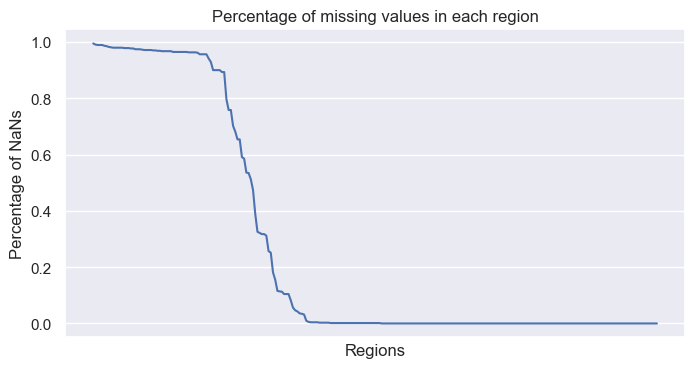

In [34]:

plt.figure(figsize=(8, 4))
ax = sns.lineplot(data=region_nan_pct_df, x='RegionName', y='nan_pct')
ax.set(title='Percentage of missing values in each region', xlabel='Regions', ylabel='Percentage of NaNs')
plt.xticks([]) # Disabling region names on x-axis - too long
plt.show()
plt.close()



##### How many regions have more than 60% of the price values as missing? - We can ignore these from our consideration for lack of enough data.

In [35]:
cnt = region_nan_pct_df[region_nan_pct_df.nan_pct > 0.6].shape[0]

##### Which States have most missing price values, in absolute terms?

<Axes: title={'center': 'Number of missing values by state'}, xlabel='State', ylabel='Number of missing values'>

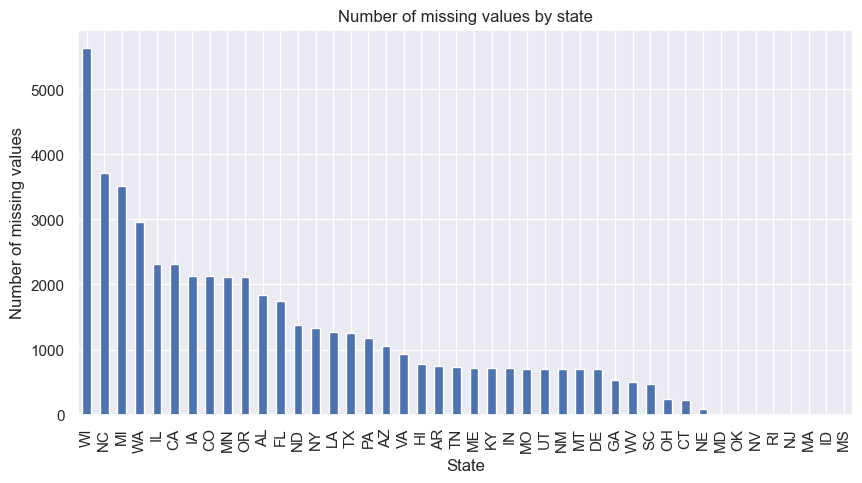

In [36]:
state_names = data_df['StateName'].values
missing_values_by_state = data_df[['StateName'] + non_id_cols].isna().groupby(state_names)[non_id_cols].sum().sum(axis=1)
missing_values_by_state.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), 
                                                xlabel='State', ylabel='Number of missing values', 
                                                title='Number of missing values by state')

##### Which States have most missing price values, as a percentage of total data's missing values?

<Axes: title={'center': 'Percentage of total missing values by state'}, xlabel='State', ylabel='Pct. of total missing values'>

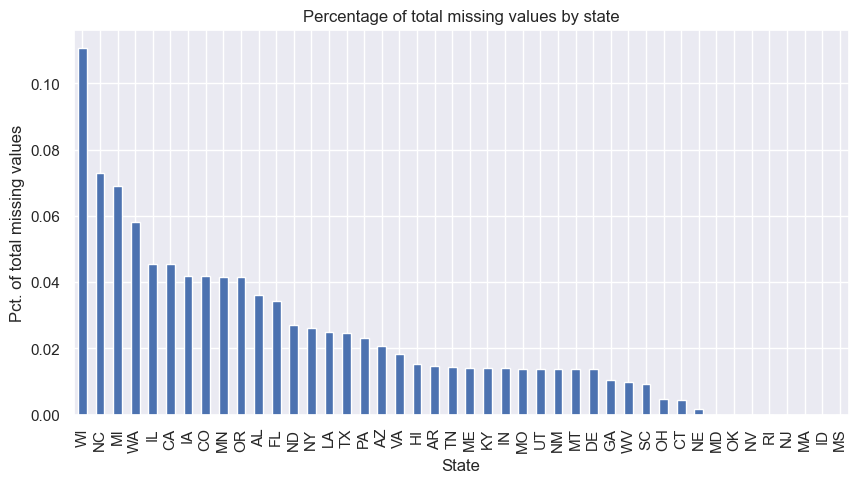

In [37]:
state_names = data_df['StateName'].values
missing_values_by_state = data_df[['StateName'] + non_id_cols].isna().groupby(state_names)[non_id_cols].sum().sum(axis=1)
tot_missing_values = data_df[non_id_cols].isna().sum().sum()
missing_pct = missing_values_by_state/tot_missing_values
missing_pct.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), 
                                              xlabel='State', ylabel='Pct. of total missing values', 
                                              title='Percentage of total missing values by state')

None of the states seems to contribute predominantly to the total missing values we have. 
Let's dig in deeper.

##### Which States have most missing price values, as a percentage of data from that state?

<Axes: title={'center': "Missing value Pct. by state as a ratio of state's data size"}, xlabel='State', ylabel='Missing value ratio'>

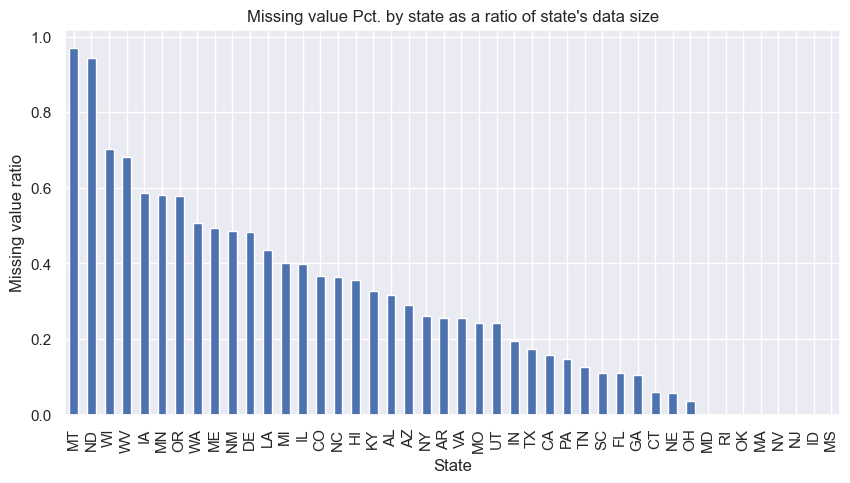

In [38]:
state_names = data_df['StateName'].values
grouper = data_df[['StateName'] + non_id_cols].isna().groupby(state_names)[non_id_cols]

state_missing_value_cnt = grouper.sum().sum(axis=1)
state_data_sizes = grouper.size() * len(non_id_cols)

state_missing_data_ratio = state_missing_value_cnt / state_data_sizes
state_missing_data_ratio.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), 
                                        xlabel='State', ylabel='Missing value ratio', 
                                        title='Missing value Pct. by state as a ratio of state\'s data size')

### Drop the regions where more than 40% of the data from that region is missing

In [39]:
# from that region is missing
threshold = 0.4

region_nan_pct_df['nan_pct'] = region_nan_pct_df['nan_pct'].astype(float)
regions_to_drop = region_nan_pct_df[region_nan_pct_df['nan_pct'] > threshold]['RegionName']

print("Number of regions to drop: ", len(regions_to_drop))
print("regions_to_drop[:10]: ", regions_to_drop[:10])
print("-"*5)
print("Before dropping regions:")
print("Number of regions before dropping: ", len(data_df['RegionName'].unique()))
print("data_df.shape: ", data_df.shape)
data_df = data_df[~data_df['RegionName'].isin(regions_to_drop)]
print("-"*5)
print("After dropping regions:")
print("Number of regions before dropping: ", len(data_df['RegionName'].unique()))
print("data_df.shape: ", data_df.shape)

Number of regions to drop:  73
regions_to_drop[:10]:  254    Breckenridge, CO
246       Sheboygan, WI
233          Bangor, ME
243            Ames, IA
178          Yakima, WA
245       Wenatchee, WA
240        Bismarck, ND
251        Brainerd, MN
239       La Crosse, WI
215      Eau Claire, WI
Name: RegionName, dtype: object
-----
Before dropping regions:
Number of regions before dropping:  255
data_df.shape:  (255, 733)
-----
After dropping regions:
Number of regions before dropping:  182
data_df.shape:  (182, 733)


##### After dropping regions; check if at the state level; any of the states still have more than 40% of the data missing.<br>
##### If yes, drop the states altogether

In [40]:
threshold = 0.4

state_names = data_df['StateName'].values
grouper = data_df[['StateName'] + non_id_cols].isna().groupby(state_names)[non_id_cols]

state_missing_value_cnt = grouper.sum().sum(axis=1)
state_data_sizes = grouper.size() * len(non_id_cols)

state_missing_data_ratio = state_missing_value_cnt / state_data_sizes
# state_missing_data_ratio.sort_values(ascending=False).plot(kind='bar', figsize=(20, 10), xlabel='State', ylabel='Missing value ratio')

states_to_drop = state_missing_data_ratio[state_missing_data_ratio > threshold].index.values

print("Number of states to drop: ", len(states_to_drop))
print("states_to_drop[:10]: ", states_to_drop[:10])
print("-"*5)
print("Before dropping States:")
print("Number of states before dropping: ", len(data_df['StateName'].unique()))
print("data_df.shape: ", data_df.shape)
data_df = data_df[~data_df['StateName'].isin(states_to_drop)]
print("-"*5)
print("After dropping states:")
print("Number of states before dropping: ", len(data_df['StateName'].unique()))
print("data_df.shape: ", data_df.shape)

Number of states to drop:  0
states_to_drop[:10]:  []
-----
Before dropping States:
Number of states before dropping:  42
data_df.shape:  (182, 733)
-----
After dropping states:
Number of states before dropping:  42
data_df.shape:  (182, 733)


### Let's visualize the missing values to get better idea of the missing value spread/distribution. THis can give us better clues for filling in missing values.

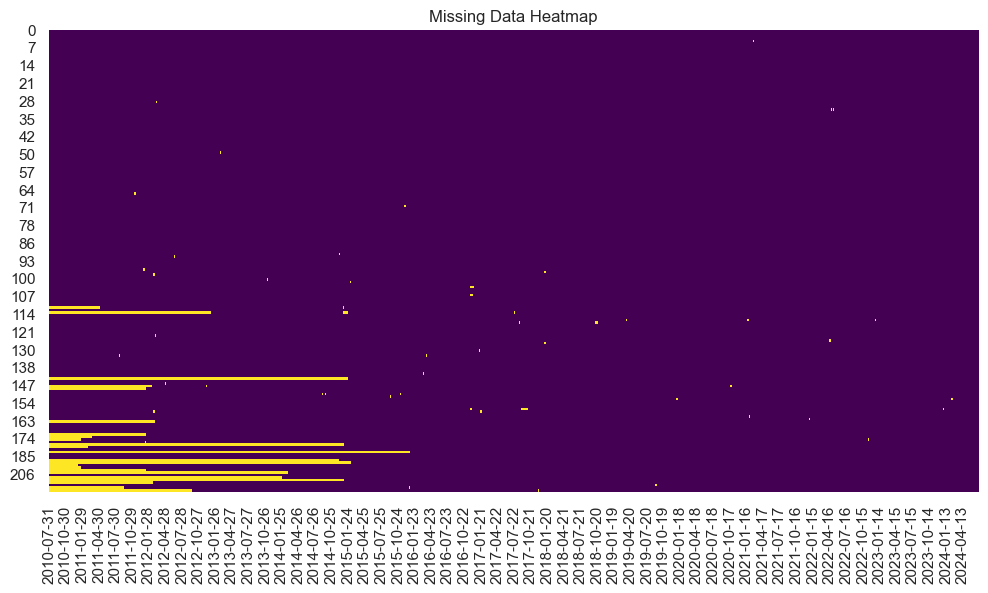

In [41]:
plt.figure(figsize=(12, 6))
sns.heatmap(data_df[non_id_cols].isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

### Let's fill the missing values - that are intermediate or towards the end of the time series - with the linear interpolation

In [42]:
print("# of missing values BEFORE interpolation: ", data_df[non_id_cols].isna().sum().sum())
data_df[non_id_cols] = data_df[non_id_cols].interpolate(method='linear', axis=1)
print("# of missing values AFTER interpolation: ", data_df[non_id_cols].isna().sum().sum())

# of missing values BEFORE interpolation:  2830
# of missing values AFTER interpolation:  2763


##### Let's visualize missing values spread again

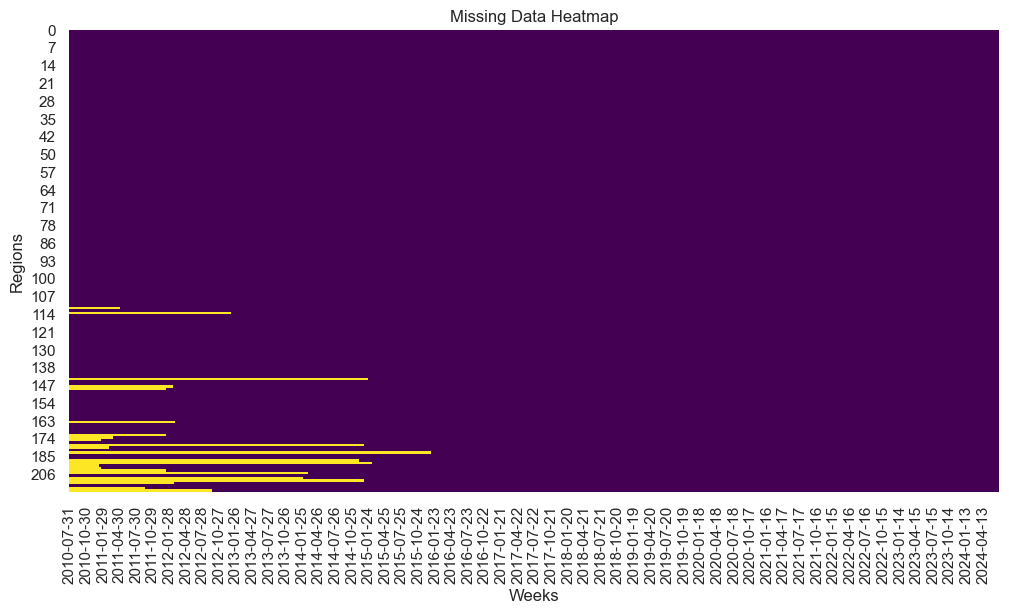

In [43]:
plt.figure(figsize=(12, 6))
sns.heatmap(data_df[non_id_cols].isnull(), cbar=False, cmap='viridis')
plt.xlabel('Weeks')
plt.ylabel('Regions')
plt.title('Missing Data Heatmap')
plt.show()

#### Now, we only have 'leading' missing values, for the regions; where we dont have data from the start.  
#### Let'd ignore these missing values for now, since interpolating/predicting in the past; especially with such short time series; 
#### may not be appropriate.

In [44]:
data_df.dtypes

RegionID        int64
SizeRank        int64
RegionName     object
RegionType     object
StateName      object
               ...   
2024-06-08    float64
2024-06-15    float64
2024-06-22    float64
2024-06-29    float64
2024-07-06    float64
Length: 733, dtype: object

### Let's check if we have infinity values anywhere

In [45]:
np.isinf(data_df[non_id_cols]).sum().sum()

0

No. Great! Let's call done for the missing/infinite value analysis/handling part.

### Now, let's vizualize the price series we have by plotting them.

#### Now, let's analyze the region-wise price series we have by plotting them.

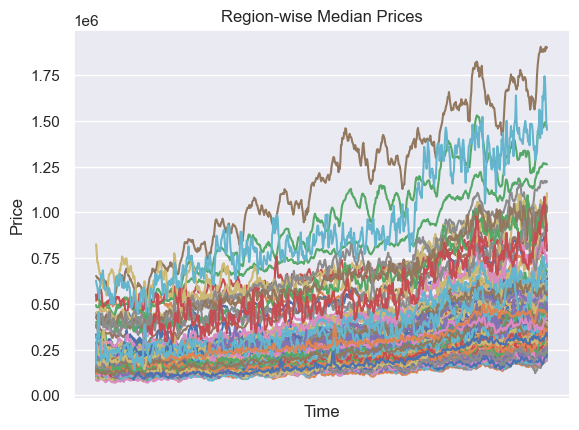

In [46]:
for index, row in data_df.iterrows():
    prices = row[non_id_cols]
    sns.lineplot(data=prices)
    
plt.title('Region-wise Median Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.xticks([]) # Disable x-axis labels to avoid clutter
plt.show()
plt.close()


We can see property prices have generally risen over time; while the growth has been more in some regions. 

##### Let's Rebase the prices to the first week for each region; for better visualization. This will tell better story of different price growth trajectories in different regions.

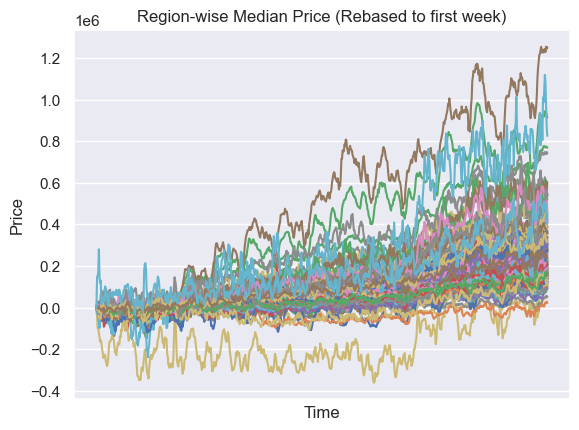

In [47]:
for index, row in data_df.iterrows():
    prices = row[non_id_cols]
    prices = prices - prices.iloc[0]
    sns.lineplot(data=prices)

plt.title('Region-wise Median Price (Rebased to first week)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.xticks([]) # Disable x-axis labels to avoid clutter
plt.show()
plt.close()


#### Let's plot state-wise average median price trends.

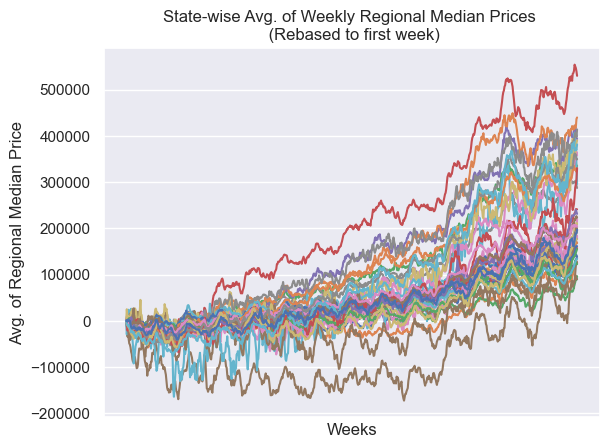

In [48]:
grouper = data_df[non_id_cols].groupby(data_df['StateName'])
state_mean_prices = grouper.apply(lambda x: x.mean(axis=0, skipna=True)).reset_index()

for index, row in state_mean_prices.iterrows():
    prices = row[non_id_cols]
    prices = prices - prices.iloc[0]
    sns.lineplot(data=prices)

plt.title('State-wise Avg. of Weekly Regional Median Prices \n (Rebased to first week)')
plt.xlabel('Weeks')
plt.ylabel('Avg. of Regional Median Price')
plt.xticks([]) # Disable x-axis labels to avoid clutter
plt.show()
plt.close()



Even at the state level; avg. median prices have risen over time except for initial phase.   
Some states had much worse decline early on the data than others.

#### Let's examine the country level median price trajectory and per month change.

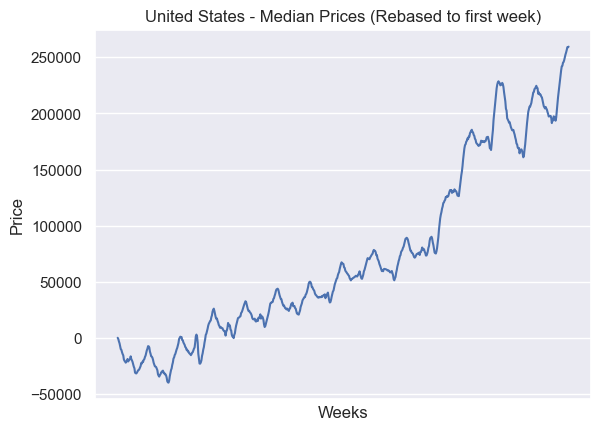

In [49]:
for index, row in data_df.iterrows():
    if row.RegionName == 'United States':
        prices = row[non_id_cols]
        prices = prices - prices.iloc[0]
        sns.lineplot(data=prices)
    
plt.title('United States - Median Prices (Rebased to first week)')
plt.xlabel('Weeks')
plt.ylabel('Price')
plt.xticks([]) # Disable x-axis labels to avoid clutter
plt.show()
plt.close()


For the country; median prices have generally increased over time after initial phase of decline.  
In both country level and region level data; there seems to be a seasonality in the price movements; rather than noisy or random price swings.

Now, Let's plot the distribution of the prices.

Text(-8.805555555555555, 0.5, 'Frequency')

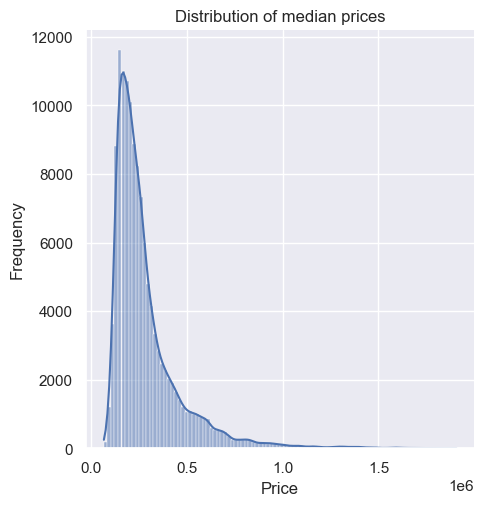

In [50]:
all_prices = []
for index, row in data_df.iterrows():
    all_prices.append(row[non_id_cols].values)

all_prices = np.array(all_prices)

sns.displot(all_prices.ravel(), kde=True, bins=100)
plt.title('Distribution of median prices')
plt.xlabel('Price')
plt.ylabel('Frequency')



### Outlier handling -  
We are already working with a data at an aggregate level - weekly data, region-wise/state-wise data, median prices, optionally smoothed data and optionally seasonally adjusted data etc.  

Whatever apparent outliers we have might actually be helpful data-points.   

So, let's skip the outlier handling.

In [51]:
pct_abv_lst_df = get_data('pct_sold_above_list', 'mean', True, True, 'week')
print("pct_abv_lst_df.shape: ", pct_abv_lst_df.shape)

Reading data from: ..\data\zillow\Metro_pct_sold_above_list_uc_sfrcondo_sm_week.csv
pct_abv_lst_df.shape:  (211, 342)


In [52]:
pct_abv_lst_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-27,2018-02-03,2018-02-10,2018-02-17,2018-02-24,...,2024-05-04,2024-05-11,2024-05-18,2024-05-25,2024-06-01,2024-06-08,2024-06-15,2024-06-22,2024-06-29,2024-07-06
0,102001,0,United States,country,NaN,0.204055,0.198646,0.201985,0.207198,0.215632,...,0.334111,0.339086,0.344197,0.348940,0.354162,0.355053,0.355774,0.355704,0.354641,0.351529
1,394913,1,"New York, NY",msa,NY,0.207301,0.208695,0.200911,0.193870,0.193419,...,0.507780,0.513992,0.527155,0.528223,0.543765,0.552262,0.559319,0.569211,0.571554,0.577942
2,753899,2,"Los Angeles, CA",msa,CA,0.360227,0.352760,0.361399,0.368063,0.387036,...,0.554123,0.561634,0.569128,0.562499,0.569837,0.562119,0.561599,0.561483,0.553001,0.544068
3,394463,3,"Chicago, IL",msa,IL,0.142069,0.142719,0.147611,0.150368,0.150496,...,0.486821,0.484064,0.495718,0.498260,0.503519,0.515230,0.516516,0.519131,0.513400,0.507103
4,394514,4,"Dallas, TX",msa,TX,0.232492,0.235887,0.244274,0.251320,0.266828,...,0.272197,0.270327,0.278827,0.273661,0.270326,0.261725,0.246455,0.243796,0.235194,0.232873


In [53]:
pct_abv_lst_df.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       '2018-01-27', '2018-02-03', '2018-02-10', '2018-02-17', '2018-02-24',
       ...
       '2024-05-04', '2024-05-11', '2024-05-18', '2024-05-25', '2024-06-01',
       '2024-06-08', '2024-06-15', '2024-06-22', '2024-06-29', '2024-07-06'],
      dtype='object', length=342)

In [54]:
# Let's calculate the percentage change in prices for each region
# price_changes = []


In [55]:
# weekly model; monthly model; weekly + monthly model

# features:
# weekly - mean - raw - sale_price
# weekly - mean - sm - sale_price
# weekly - mean - sm_sa - sale_price

# weekly - median - raw - sale_price
# weekly - median - sm - sale_price
# weekly - median - sm_sa - sale_price

# weekly - mean - raw - pct_sold_above_list
# weekly - mean - sm - pct_sold_above_list

# ----------------------------------------------

# monthly model

# monthly - mean - raw - sale_price
# monthly - mean - sm - sale_price
# monthly - mean - sm_sa - sale_price

# monthly - median - raw - sale_price
# monthly - median - sm - sale_price
# monthly - median - sm_sa - sale_price

# monthly - mean - raw - pct_sold_above_list
# monthly - mean - sm - pct_sold_above_list

# monthly - mean - raw - pct_sold_below_list
# monthly - mean - sm - pct_sold_below_list

# monthly - raw - mid-tier - ZHVI
# monthly - sm - sa - mid-tier - ZHVI

# monthly - raw - mid-tier - ZHVF
# monthly - sm - sa - mid-tier - ZHVF




In [56]:
zhvi_df = get_data('home_value_index', price_to_use='', smoothing=True, seasonal_adjustment=True, 
                   granularity='month')
print("zhvi_df.shape: ", zhvi_df.shape)

Reading data from: ..\data\zillow\Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv
zhvi_df.shape:  (895, 300)


In [57]:
zhvi_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31
0,102001,0,United States,country,NaN,123201.589358,123418.340449,123687.143717,124263.673963,124927.191155,...,354560.864823,355221.200845,355659.420738,356095.506014,356894.666458,358448.865042,360320.226713,361765.740031,362331.951468,362481.204554
1,394913,1,"New York, NY",msa,NY,219438.634519,220371.124905,221312.251831,223219.339155,225194.194122,...,637643.276581,639990.860977,642796.654212,645725.408630,649825.307458,655304.104728,661497.585194,666221.106909,669344.600356,672129.301310
2,753899,2,"Los Angeles, CA",msa,CA,226644.663860,227488.069574,228611.477941,230846.683212,233291.297037,...,931186.363273,939974.485939,945493.002814,945650.506056,942621.941749,941476.478390,945035.292214,951085.194853,955144.724038,959638.896528
3,394463,3,"Chicago, IL",msa,IL,156108.490933,156253.001920,156528.225639,157212.913856,158036.511425,...,314693.120659,315626.491130,316274.100658,316947.711390,318361.216626,320818.313607,323743.110847,325902.762091,327148.882816,327898.691839
4,394514,4,"Dallas, TX",msa,TX,127988.784838,128045.791490,128111.326472,128281.513937,128505.901449,...,378124.724331,377983.548613,377651.849224,377673.874988,378163.452032,379338.903448,380322.304026,380468.293699,379793.877492,378841.103255


In [58]:
zhvi_df.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       '2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30', '2000-05-31',
       ...
       '2023-10-31', '2023-11-30', '2023-12-31', '2024-01-31', '2024-02-29',
       '2024-03-31', '2024-04-30', '2024-05-31', '2024-06-30', '2024-07-31'],
      dtype='object', length=300)

<Axes: title={'center': 'ZHVI data for a region'}>

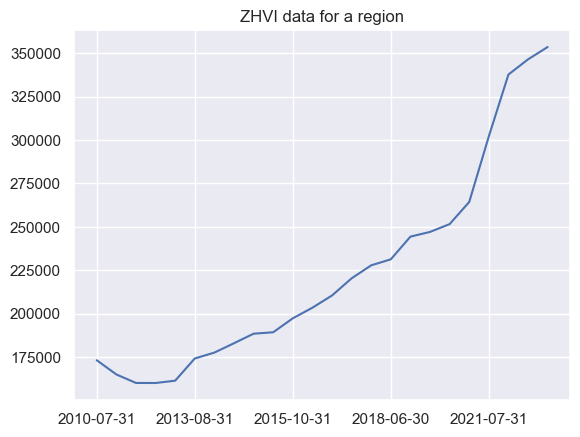

In [65]:
# ZHVI data starts from 2000; sale price data seems to be from 2008. 
# let's select columns that are common in both datasets 
cols_to_use = [col for col in zhvi_df.columns if col in non_id_cols]
zhvi_df[cols_to_use].iloc[0].plot(x='Time', y='Price', title='ZHVI data for a region')

